In [8]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

In [4]:
x = df.drop('label', axis=1)
y = df.label

In [5]:
x = x.to_numpy()

In [6]:
l = []
for i in range(len(x)):
    l.append(x[i].reshape((28, 28)))

In [9]:
x_array = np.array(l)
y_array = np.array(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.3, random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29400, 28, 28)
(12600, 28, 28)
(29400,)
(12600,)


In [15]:
# reshape to fit the model requirement
x_train = X_train.reshape(len(X_train), 28, 28, 1)
x_test = X_test.reshape(len(X_test), 28, 28, 1)

In [16]:
# Type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (29400, 28, 28, 1)
x_test shape: (12600, 28, 28, 1)


In [19]:
num_classes = len(y.unique())

In [32]:
import tensorflow as tf
from tensorflow import keras

In [22]:
# convert class vectors to binary class matrices by One-hot encoding
# e.g. 3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0 
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:2])   # verify one-hot encoding

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [24]:
from keras.models import Sequential

In [30]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [25]:
# Define the model
model = Sequential()

In [28]:
# Create a CNN to classify the images
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[28, 28, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [33]:
# Define compile
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [34]:
hist = model.fit(x_train, y_train,
                 batch_size = 420,
                 epochs = 50,
                 verbose = 1,
                 validation_data=(x_test, y_test))

Epoch 1/50
70/70 [==============================] - 15s 200ms/step - loss: 1.3328 - accuracy: 0.5474 - val_loss: 0.2823 - val_accuracy: 0.9237
Epoch 2/50
70/70 [==============================] - 14s 195ms/step - loss: 0.4331 - accuracy: 0.8702 - val_loss: 0.1487 - val_accuracy: 0.9563
Epoch 3/50
70/70 [==============================] - 13s 181ms/step - loss: 0.2709 - accuracy: 0.9231 - val_loss: 0.1081 - val_accuracy: 0.9674
Epoch 4/50
70/70 [==============================] - 13s 179ms/step - loss: 0.2152 - accuracy: 0.9421 - val_loss: 0.0935 - val_accuracy: 0.9728
Epoch 5/50
70/70 [==============================] - 13s 184ms/step - loss: 0.1795 - accuracy: 0.9496 - val_loss: 0.0811 - val_accuracy: 0.9763
Epoch 6/50
70/70 [==============================] - 14s 198ms/step - loss: 0.1600 - accuracy: 0.9566 - val_loss: 0.0775 - val_accuracy: 0.9779
Epoch 7/50
70/70 [==============================] - 14s 199ms/step - loss: 0.1438 - accuracy: 0.9611 - val_loss: 0.0666 - val_accuracy: 0.9794

In [37]:
import matplotlib.pyplot as plt

In [ ]:
#randomly show 1 picture
plt.imshow(x_train[3])

In [35]:
hist.history

{'loss': [1.3327728509902954,
  0.4330514371395111,
  0.27089574933052063,
  0.21517181396484375,
  0.17950919270515442,
  0.15997257828712463,
  0.14376795291900635,
  0.11998678743839264,
  0.116846464574337,
  0.10066410154104233,
  0.09454641491174698,
  0.0934281274676323,
  0.08603661507368088,
  0.08215443789958954,
  0.07830772548913956,
  0.06882542371749878,
  0.06934153288602829,
  0.06357712298631668,
  0.05979583039879799,
  0.05757680907845497,
  0.05588383972644806,
  0.05477102845907211,
  0.04807698726654053,
  0.05095147341489792,
  0.04734618216753006,
  0.04727817699313164,
  0.043763816356658936,
  0.04090328887104988,
  0.04093955084681511,
  0.037348341196775436,
  0.03537145256996155,
  0.03673930838704109,
  0.032341863960027695,
  0.03270052373409271,
  0.03368864208459854,
  0.03212692216038704,
  0.03222980350255966,
  0.030986463651061058,
  0.02822999283671379,
  0.025739964097738266,
  0.02935459092259407,
  0.027984047308564186,
  0.026398705318570137,
 

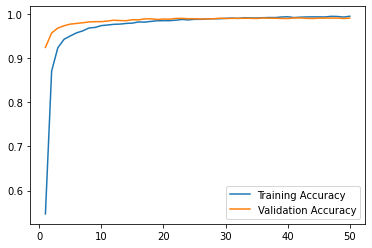

In [38]:
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [39]:
#print summary statistics of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [40]:
# Save neural network structure
from pathlib import Path
model_structure = model.to_json()
f = Path("digit_recognizer_model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("digit_recognizer_model_weights.h5")

In [41]:
test = pd.read_csv('test.csv')

In [42]:
test

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
27995       0  ...         0         0         0         0         0   
27996       0  ...         0         0         0         0         0   
27997       0  ...         0         0         0         0         0   
27998       0  ...         0         0         0         0         0   
27999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
27995         0         0         0         0         0  
27996         0         0         0         0         0  
27997         0         0         0         0         0  
27998         0         0         0         0         0  
27999         0         0         0         0         0  

[28000 rows x 784 columns]

In [43]:
a = test.to_numpy()

In [44]:
l1 = []
for i in range(len(a)):
    l1.append(a[i].reshape((28, 28)))

In [45]:
l1

[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  17,  17,
          17,  17,  81, 180, 180,  35,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253, 253,
         253, 253, 253, 253, 253,  48,   0,   0,   0,   0,   0,   0,   0,
           0

In [46]:
a_array = np.array(l1)

In [47]:
a_array

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [48]:
len(a_array)

28000

In [49]:
prediction = model.predict(a_array)

In [50]:
prediction

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [51]:
len(prediction)

28000

In [61]:
pred = np.argmax(prediction, axis=1)

In [63]:
pred

28000

In [73]:
ImageId=[i for i in range(1,28001)]

In [84]:
submission = pd.DataFrame(zip(ImageId, pred), columns=["ImageId", "Label"])

In [85]:
submission

ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      0
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]

In [86]:
submission.to_csv("submission.csv", index=False)